### SVM(Support Vector Machine)실습 예제

### 1. Data Generation

In [1]:
from sklearn import datasets #sklearn에 내장 되어 있는 데이터를 이용할 것임. 
iris = datasets.load_iris() #데이터를 불러옴

In [2]:
print(iris.feature_names) ## 독립변수 
print(iris.target_names) ## 종속변수 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
X = iris.data[:, [2, 3]]
Y = iris.target

In [4]:
print(X.shape) ## 독립변수의 모양 두개의 Features 
print(Y.shape) ## 종속변수의 모양 카테고리의 개수는 3개(0, 1, 2)

(150, 2)
(150,)


In [5]:
X[0:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [6]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 2. 전처리 Preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler ## 전처리로 평균이 0과 표준편차가 1이 되도록 변환 
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [8]:
X_std[0:5]

array([[-1.34022653, -1.3154443 ],
       [-1.34022653, -1.3154443 ],
       [-1.39706395, -1.3154443 ],
       [-1.2833891 , -1.3154443 ],
       [-1.34022653, -1.3154443 ]])

### 3. Training Data / Test Data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_std, # 독립변수 
                                                    Y,  # 종속변수 
                                                    test_size=0.2, # 8:2로 트레이닝 테스트를 나눔
                                                    random_state = 1, # seed와 같은 개념 섞어 준다. 
                                                    stratify = Y # 결과값의 분류를 비슷한 비율로 나누어줌 
                                                   )
                                                    

In [10]:
print(len(X_train))
print(len(X_test))

120
30


In [11]:
'''
random_state : 난수생성의 씨드를 준다고 생각하면됨 어떤 숫자가 와도 상관없음.
stratify :  Y가 지금 0~2까지의 수로 분류가 되어져 있는데 Test에 들어가는 비율과
Training에 들어가는 비율을 맞추어 주기 위해 사용
'''

'\nrandom_state : 난수생성의 씨드를 준다고 생각하면됨 어떤 숫자가 와도 상관없음.\nstratify :  Y가 지금 0~2까지의 수로 분류가 되어져 있는데 Test에 들어가는 비율과\nTraining에 들어가는 비율을 맞추어 주기 위해 사용\n'

### 4. Training

In [12]:
## 꼭 먼저 실행 시켜 주세요! 
####################################################################################
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y, classifier, test_idx = None, resolution = 0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z,  alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl, 0], y = X[y ==cl, 1],
                    alpha = 0.8, c = colors[idx],
                    marker = markers[idx], label = cl,
                    edgecolor = 'black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:,1], c = '', edgecolor = 'black'
                    , alpha = 1.0, linewidth = 1, marker = 'o',
                    s = 100, label = 'test set')

######################################################################################

In [18]:
from sklearn.svm import SVC
import numpy as np

#### 4.1 선형 분류

In [19]:
### 파라미터는 C 우리가 움직이면서 최상의 SVM을 알아내야 한다. 
## C가 커지게 되면 오분류에 대한 벌칙을 강하게 주는 것임 to Hard Margin
## C가 작아지게 되면 오분류에 대한 벌칙을 약하게 주는 것임 to Soft Margin
svm_linear = SVC(kernel = 'linear', C =1, random_state = 1, tol = 1e-4, verbose = True)

In [20]:
svm_linear.fit(X_train, Y_train)

[LibSVM]

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.0001, verbose=True)

In [21]:
X_combined_std = np.vstack((X_train, X_test))
Y_combined = np.hstack((Y_train, Y_test))

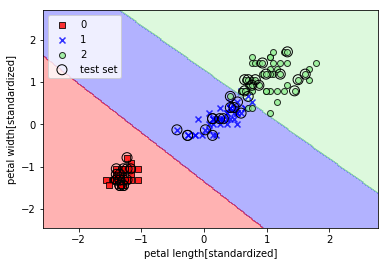

In [22]:
plot_decision_regions(X_combined_std, Y_combined, classifier = svm,
                      test_idx = range(105, 150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc = 'upper left')

In [23]:
### X를 통해 Y를 예측함 
Y_score = svm.predict(X_test)

In [24]:
print(Y_test)
print(Y_score)

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]
[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 1 0 0 1 1]


### 5. 성능평가

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [26]:
print(confusion_matrix(Y_test, svm.predict(X_test)))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [27]:
accuracy_score(Y_test, svm.predict(X_test))

0.9666666666666667

In [28]:
print(classification_report(Y_test, Y_score, target_names = iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### 4.2 다항 분류

In [53]:
# 파라미터는 C, gamma, coef0, degree를 바꾸어 주면서 Accuracy를 높인다. 
polysvm = SVC(kernel="poly",C = 1, degree=2, gamma=1, coef0=0)
#polysvm = SVC(kernel="poly",C = 1, degree=2, gamma=1, coef0=0)
## gamma는 점하나에 가중을 높이는 것이다. 클수록 바운더리가 좁아진다. 
## degree는 다항함수의 차수를 증가시키는 것이다. 

In [54]:
polysvm.fit(X_train, Y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0,
  decision_function_shape='ovr', degree=2, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

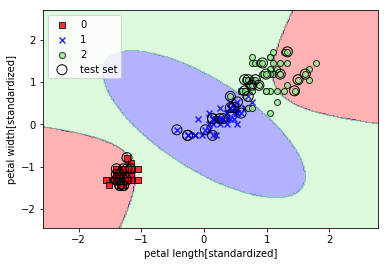

In [55]:
plot_decision_regions(X_combined_std, Y_combined, classifier = polysvm,
                      test_idx = range(105, 150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc = 'upper left')

In [57]:
### X를 통해 Y를 예측함 
Y_score = polysvm.predict(X_test)

In [58]:
print(Y_test)
print(Y_score)

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]
[0 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 0 1 1 2 1 1 0 0 2 1 0 0 1 1]


### 5. 성능평가

In [65]:
print("Confusion_Matrix\n", confusion_matrix(Y_test, polysvm.predict(X_test)))
print("Accrracy:" , accuracy_score(Y_test, polysvm.predict(X_test)))
print("Each Accuracy:\n", classification_report(Y_test, Y_score, target_names = iris.target_names))

Confusion_Matrix
 [[10  0  0]
 [ 0 10  0]
 [ 2  1  7]]
Accrracy: 0.9
Each Accuracy:
               precision    recall  f1-score   support

      setosa       0.83      1.00      0.91        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.70      0.82        10

   micro avg       0.90      0.90      0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.91      0.90      0.90        30



#### 4.3 RBF(Gaussian) 분류기 

In [72]:
#rbfsvm = SVC(kernel="rbf", gamma = 1)
rbfsvm = SVC(kernel="rbf",C = 1.0, gamma = 10)
rbfsvm.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

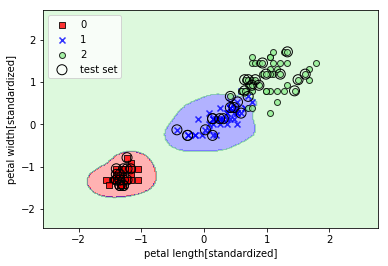

In [73]:
plot_decision_regions(X_combined_std, Y_combined, classifier = rbfsvm,
                      test_idx = range(105, 150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc = 'upper left')

In [74]:
### X를 통해 Y를 예측함 
Y_score = polysvm.predict(X_test)
print(Y_test)
print(Y_score)

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]
[0 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 0 1 1 2 1 1 0 0 2 1 0 0 1 1]


### 5. 성능평가

In [75]:
print("Confusion_Matrix\n", confusion_matrix(Y_test, rbfsvm.predict(X_test)))
print("Accrracy:" , accuracy_score(Y_test, rbfsvm.predict(X_test)))
print("Each Accuracy:\n", classification_report(Y_test, Y_score, target_names = iris.target_names))

Confusion_Matrix
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Accrracy: 0.9666666666666667
Each Accuracy:
               precision    recall  f1-score   support

      setosa       0.83      1.00      0.91        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.70      0.82        10

   micro avg       0.90      0.90      0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.91      0.90      0.90        30



#### 4.4 sigmoid 분류기

In [80]:
#sigmoidsvm = SVC(kernel="rbf", gamma = 1)
sigmoidsvm = SVC(kernel="sigmoid", C = 1.0, gamma = 10, coef0 = 2)
sigmoidsvm.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=2,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

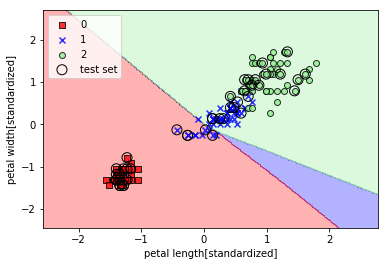

In [81]:
plot_decision_regions(X_combined_std, Y_combined, classifier = sigmoidsvm,
                      test_idx = range(105, 150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc = 'upper left')

In [82]:
### X를 통해 Y를 예측함 
Y_score = polysvm.predict(X_test)
print(Y_test)
print(Y_score)

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]
[0 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 0 1 1 2 1 1 0 0 2 1 0 0 1 1]


### 5. 성능평가

In [83]:
print("Confusion_Matrix\n", confusion_matrix(Y_test, rbfsvm.predict(X_test)))
print("Accrracy:" , accuracy_score(Y_test, rbfsvm.predict(X_test)))
print("Each Accuracy:\n", classification_report(Y_test, Y_score, target_names = iris.target_names))

Confusion_Matrix
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Accrracy: 0.9666666666666667
Each Accuracy:
               precision    recall  f1-score   support

      setosa       0.83      1.00      0.91        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.70      0.82        10

   micro avg       0.90      0.90      0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.91      0.90      0.90        30

